<a href="https://colab.research.google.com/github/prajwalt1405/Predictive-Maintenance-of-Aircraft-Engine-Failure/blob/main/Predictive_maintenance_sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from sklearn.metrics import recall_score
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, LSTM, Activation
%matplotlib inline

 [DATA SOURCE ](https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data)
 From Nasa.gov

In [ ]:
#df is for train data. dfTest is for test data
df = pd.read_csv('/content/train_FD001.txt', sep=" ", header=None)
df.columns=["unit_id",	"cycles",	"set1",	"set2",	"set3",	"s1",	"s2",	"s3"	,"s4"	,"s5"	,"s6"	,"s7"	,"s8"	,"s9"	,"s10"	,"se11"	,"s12"	,"s13"	,"s14"	,"s15",	"s16"	,"s17",	"s18"	,"s19",	"s20"	,"s21","s22","s23"]
dfTest = pd.read_csv('/content/test_FD001.txt', sep=" ", header=None)
dfTest.columns=["unit_id",	"cycles",	"set1",	"set2",	"set3",	"s1",	"s2",	"s3"	,"s4"	,"s5"	,"s6"	,"s7"	,"s8"	,"s9"	,"s10"	,"se11"	,"s12"	,"s13"	,"s14"	,"s15",	"s16"	,"s17",	"s18"	,"s19",	"s20"	,"s21","s22","s23"]

In [ ]:
dfTest.head()

,unit_id,cycles,set1,set2,set3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,se11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [ ]:
df.head()

,unit_id,cycles,set1,set2,set3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,se11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [ ]:
# sort the dataframe such that engines and their number of cycles are in ascending order
df=df.sort_values(['unit_id', 'cycles'], ascending = [True, True])
dfTest=dfTest.sort_values(['unit_id', 'cycles'], ascending = [True, True])

In [ ]:
# Read data of Remaining useful life(RUL) of engines in test set
dfRUL=pd.read_csv('/content/RUL_FD001.txt', header=None)
dfRUL.columns=["RULmax"]
# associate it with id of engines
dfRUL['unit_id']=np.arange(1,len(dfRUL)+1)
dfRUL.head()

,RULmax,unit_id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [ ]:
#merge two dataframe such that we have info of max RUL for each record
#subtract number of cycles from each record from RULmax to get RUL
dfTest=pd.merge(dfTest, dfRUL, on='unit_id')
dfTest['RUL']=(dfTest.groupby(['unit_id'])['cycles'].transform(max)+dfTest['RULmax'])-dfTest['cycles']

<ipython-input-7-6082f857612e>:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dfTest['RUL']=(dfTest.groupby(['unit_id'])['cycles'].transform(max)+dfTest['RULmax'])-dfTest['cycles']


In [ ]:
# sensors s22 and s23 has no data so drop them
df=df.drop(['s22','s23'],axis=1)
dfTest=dfTest.drop(['s22','s23'],axis=1)

In [ ]:

print("Max count in Train set")
print("id=",df['unit_id'].value_counts().idxmax())
print("value=",df['unit_id'].value_counts().max())
print("\n\nMin count in Train set")
print("id=",df['unit_id'].value_counts().idxmin())
print("value=",df['unit_id'].value_counts().min())

Max count in Train set
id= 69
value= 362


Min count in Train set
id= 39
value= 128


In [ ]:

print("Max count in Test set")
print("id=",dfTest['unit_id'].value_counts().idxmax())
print("value=",dfTest['unit_id'].value_counts().max())
print("\n\nMin count in Test set")
print("id=",dfTest['unit_id'].value_counts().idxmin())
print("value=",dfTest['unit_id'].value_counts().min())

Max count in Test set
id= 49
value= 303


Min count in Test set
id= 1
value= 31


In [ ]:
# Get the count of records per engine in the test set
testCount = dfTest['unit_id'].value_counts()

# Identify engines with fewer than or equal to 70 records
engines_to_drop = testCount[testCount <= 70].index

# Drop the rows in dfTest where unit_id is in the list of engines to drop
dfTest_cleaned = dfTest[~dfTest['unit_id'].isin(engines_to_drop)]

# Verify that the data is cleaned and print value counts in ascending order
print(dfTest_cleaned['unit_id'].value_counts().sort_values(ascending=True))


unit_id
67     71
65     71
78     72
47     73
83     73
     ... 
12    217
62    232
91    234
93    244
49    303
Name: count, Length: 86, dtype: int64


In [ ]:
# subtract current number of cycles from maximum cycles for each id to get RUL
df['RUL']=df.groupby(['unit_id'])['cycles'].transform(max)-df['cycles']
dfTest=dfTest.drop("RULmax",axis=1)



<ipython-input-12-4fc1f7ac89d3>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['RUL']=df.groupby(['unit_id'])['cycles'].transform(max)-df['cycles']


In [ ]:
# normalise data to get a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:,1:-1]=scaler.fit_transform(df.iloc[:,1:-1])
dfTest.iloc[:,1:-1]=scaler.fit_transform(dfTest.iloc[:,1:-1])

<ipython-input-13-44eaa20b9f17>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.00277008 0.00554017 ... 0.54570637 0.54847645 0.55124654]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:-1]=scaler.fit_transform(df.iloc[:,1:-1])
<ipython-input-13-44eaa20b9f17>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:-1]=scaler.fit_transform(df.iloc[:,1:-1])
<ipython-input-13-44eaa20b9f17>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.00331126 0.00662252 ... 0.64569536 0.64900662 0.65231788]' has dtype incompatible with int64, p

In [ ]:
# Some record have zero std dev
df.describe()

,unit_id,cycles,set1,set2,set3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,se11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,0.298637,0.499490,0.501959,0.0,0.0,0.443052,0.424746,0.450435,0.0,0.980321,0.566459,0.297957,0.195248,0.0,0.411410,0.580697,0.317871,0.226095,0.451118,0.0,0.434221,0.0,0.0,0.524241,0.546127,107.807862
std,29.227633,0.190806,0.125708,0.244218,0.0,0.0,0.150618,0.133664,0.151935,0.0,0.138898,0.142527,0.107554,0.099089,0.0,0.158981,0.157261,0.105763,0.098442,0.144306,0.0,0.129064,0.0,0.0,0.140114,0.149476,68.880990
min,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,26.000000,0.141274,0.413793,0.333333,0.0,0.0,0.335843,0.331807,0.339467,0.0,1.000000,0.476651,0.227273,0.140761,0.0,0.297619,0.484009,0.235294,0.171870,0.346287,0.0,0.333333,0.0,0.0,0.434109,0.452361,51.000000
50%,52.000000,0.285319,0.500000,0.500000,0.0,0.0,0.430723,0.415522,0.435348,0.0,1.000000,0.578100,0.287879,0.174684,0.0,0.392857,0.594883,0.308824,0.209516,0.438630,0.0,0.416667,0.0,0.0,0.534884,0.557443,103.000000
75%,77.000000,0.429363,0.586207,0.750000,0.0,0.0,0.539157,0.508829,0.545324,0.0,1.000000,0.669887,0.363636,0.213991,0.0,0.505952,0.695096,0.382353,0.249613,0.541362,0.0,0.500000,0.0,0.0,0.627907,0.652582,155.000000
max,100.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,361.000000


In [ ]:
# Some record have zero std dev
dfTest.describe()

,unit_id,cycles,set1,set2,set3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,se11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.0,13096.000000,13096.000000,13096.000000,13096.0,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.000000,13096.0,13096.0,13096.000000,13096.000000,13096.000000
mean,51.543907,0.251114,0.511801,0.464798,0.0,0.0,0.424318,0.494916,0.415466,0.0,0.970067,0.580146,0.441377,0.259597,0.0,0.422058,0.540576,0.420988,0.271904,0.446040,0.0,0.446453,0.0,0.0,0.529547,0.566656,141.238470
std,28.289423,0.175688,0.137668,0.226177,0.0,0.0,0.126467,0.129921,0.136580,0.0,0.170408,0.137356,0.140102,0.087634,0.0,0.134190,0.127769,0.132405,0.090986,0.139067,0.0,0.154197,0.0,0.0,0.128801,0.119066,58.980114
min,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,7.000000
25%,28.000000,0.105960,0.418750,0.307692,0.0,0.0,0.336751,0.404051,0.317746,0.0,1.000000,0.489919,0.341463,0.202989,0.0,0.321918,0.456621,0.325581,0.212627,0.348993,0.0,0.375000,0.0,0.0,0.445455,0.490021,102.000000
50%,52.000000,0.225166,0.512500,0.461538,0.0,0.0,0.419558,0.492080,0.409434,0.0,1.000000,0.588710,0.439024,0.251264,0.0,0.417808,0.547945,0.418605,0.266923,0.441515,0.0,0.500000,0.0,0.0,0.536364,0.571550,140.000000
75%,76.000000,0.370861,0.606250,0.692308,0.0,0.0,0.507886,0.579655,0.503574,0.0,1.000000,0.677419,0.536585,0.303295,0.0,0.506849,0.632420,0.511628,0.320236,0.534516,0.0,0.500000,0.0,0.0,0.618182,0.648549,179.000000
max,100.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,340.000000


Text(0.5, 0, 'All settings and sensors over time in Train Set for Engine ID=1')

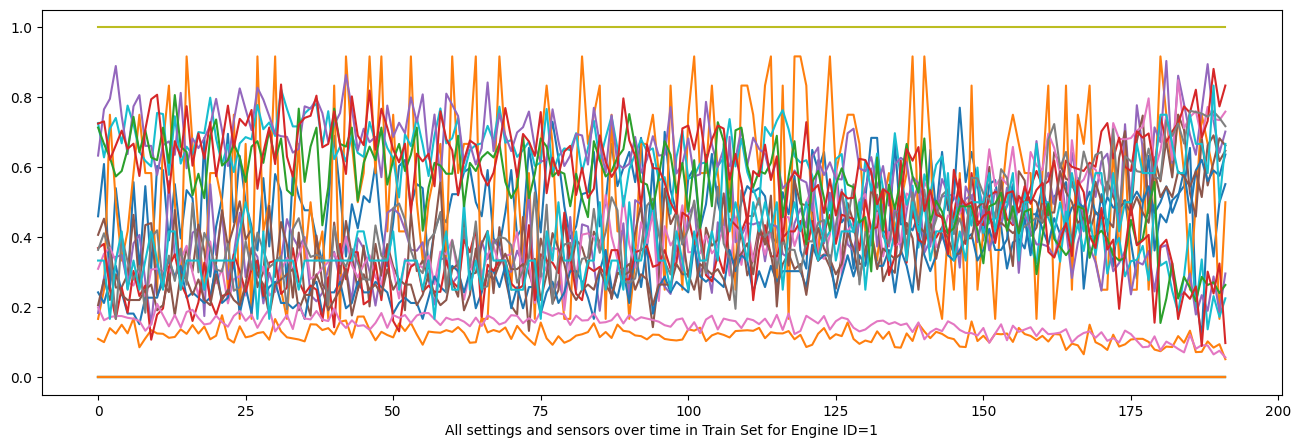

In [ ]:
ax = df.loc[(df.unit_id == 1)].iloc[:,2:-1].plot(figsize=(16, 5),legend=None)
ax.set_xlabel("All settings and sensors over time in Train Set for Engine ID=1")

Text(0.5, 0, 'All settings and sensors over time in Test Set for Engine ID=99 ')

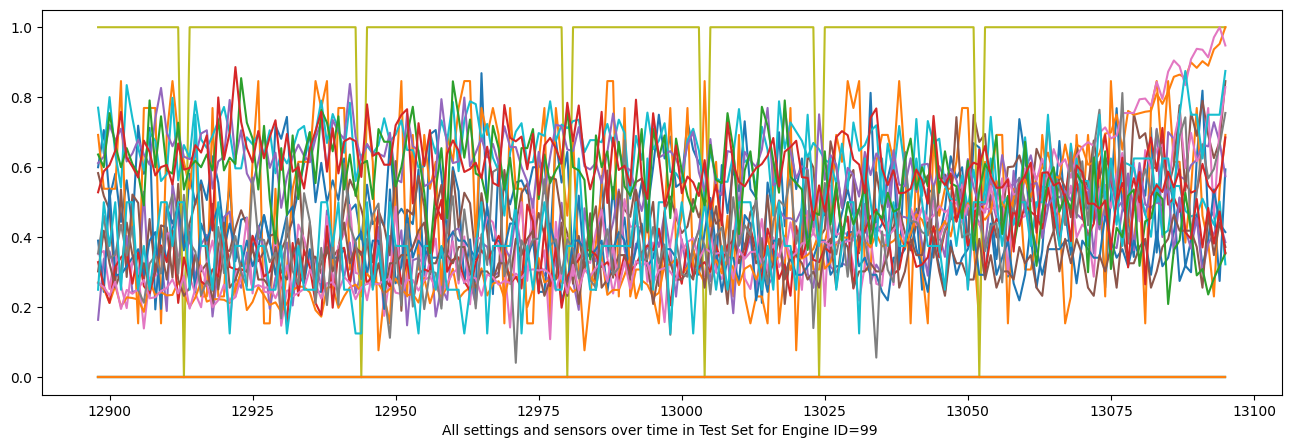

In [ ]:
ax = dfTest.loc[(dfTest.unit_id == 100)].iloc[:,2:-1].plot(figsize=(16, 5),legend=None)
ax.set_xlabel("All settings and sensors over time in Test Set for Engine ID=99 ")

Text(0.5, 0, 'All settings and sensors over time in Test Set for Engine ID=96 ')

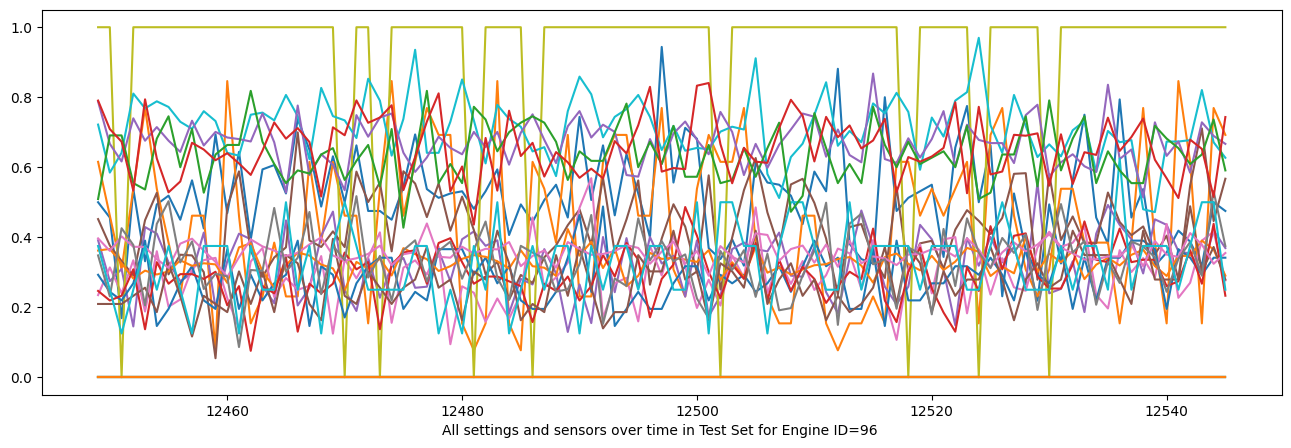

In [ ]:
ax = dfTest.loc[(dfTest.unit_id == 96)].iloc[:,2:-1].plot(figsize=(16, 5),legend=None)
ax.set_xlabel("All settings and sensors over time in Test Set for Engine ID=96 ")

In [ ]:
# Creating class labels
# 1 when engine is going to fail within next 30 cycles. 0 otherwise
df['label30']=np.where(df['RUL']<30,0,0)
dfTest['label30']=np.where(dfTest['RUL']<30,0,0)

In [ ]:
# 70 timesteps (cycles) to produce one sequence
batch70=70
trainIDs=list(df['unit_id'].unique())
inputNP = np.empty((0,18), int)
labelList=[]

In [ ]:
# Initialize a list to store the inputs and labels
inputNP = []
labelList = []

# Loop through each unit_id to create the 3D array for LSTM input
for id in trainIDs:
    dfTemp = df.loc[df['unit_id'] == id]  # Filter data for each unit_id
    start = 0
    # Loop to create sequences of length batch70 (70 timesteps)
    for i in range(len(dfTemp) - batch70 + 1):
        # Append the sequence of sensors/settings (excluding the first column 'unit_id' and the last column 'RUL')
        sequence = dfTemp.iloc[start:start + batch70, 1:-2].values  # This takes columns from index 1 to second last
        inputNP.append(sequence)  # Add sequence to input list

        # Append the label (label30 for the sequence)
        labelList.append(dfTemp['label30'].iloc[start + batch70 - 1])

        start += 1  # Move the start index by 1 for the next sequence

# Convert inputNP to a numpy array and reshape to 3D (samples, timesteps, features)
inputNP = np.array(inputNP)  # List of sequences
trainLSTM = np.reshape(inputNP, (-1, batch70, inputNP.shape[2]))  # Reshaped to (samples, 70, features)

# Convert to float32 for training the model
trainLSTM = trainLSTM.astype('float32')

# Check the shape of the resulting array
trainLSTM.shape


(13731, 70, 25)

In [ ]:
# Array for training labels
trainLabel=np.array(labelList) #labelList is a list or another array containing your training labels.
trainLabel=np.reshape(trainLabel, (-1,1))
trainLabel.shape

(13731, 1)

In [ ]:
# Array for testing labels
testLabel=np.array(labelList)
testLabel=np.reshape(testLabel, (-1,1))
testLabel.shape

(13731, 1)

In [ ]:
import tensorflow as tf

# Enable eager execution for tf.data functions
tf.data.experimental.enable_debug_mode()




In [ ]:
#Modeling
from tensorflow.keras import regularizers
batch70=70
opt = keras.optimizers.Adam(learning_rate=0.004)
model = Sequential()
model.add(LSTM(input_shape=(batch70, trainLSTM.shape[2]),units=100,return_sequences=True,activity_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(LSTM(units=50,return_sequences=False,activity_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(units=1, activation='sigmoid'))  #  'sigmoid' activation for binary classification
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.Recall()])
print(model.summary())
model.save('model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 70, 100)             │          50,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,651 (315.04 KB)

 Trainable params: 80,651 (315.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
resultTrain = model.fit(
    trainLSTM,
    trainLabel,
    epochs=20,
    batch_size=256,
    validation_split=0.25,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0)]
)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 512ms/step - loss: 49.7012 - recall: 0.0000e+00 - val_loss: 1.7215 - val_recall: 0.0000e+00
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 559ms/step - loss: 1.5381 - recall: 0.0000e+00 - val_loss: 1.1239 - val_recall: 0.0000e+00
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 502ms/step - loss: 1.0623 - recall: 0.0000e+00 - val_loss: 0.8594 - val_recall: 0.0000e+00
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 492ms/step - loss: 0.8229 - recall: 0.0000e+00 - val_loss: 0.6864 - val_recall: 0.0000e+00
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 550ms/step - loss: 0.6617 - recall: 0.0000e+00 - val_loss: 0.5672 - val_recall: 0.0000e+00
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 504ms/step - loss: 0.5509 - recall: 0.0000e+00 - val_loss: 0.4821 - val_recall: 0.0000e+00
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 501ms/step - loss: 0.4716 - recall: 0.0000e+00 - val_loss: 0.4174 - val_recall: 0.0000e+00
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 567ms/step - loss: 0.4099 

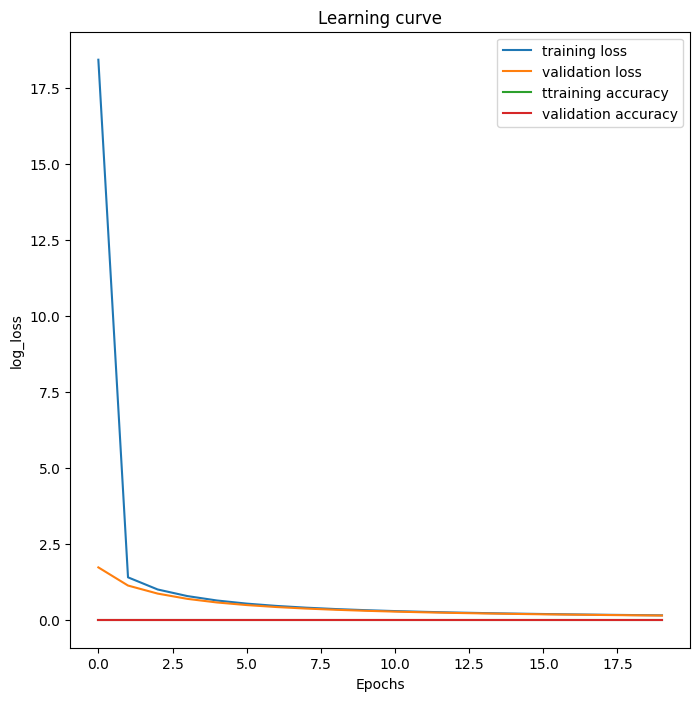

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(resultTrain.history["loss"], label="training loss")
plt.plot(resultTrain.history["val_loss"], label="validation loss")
plt.plot(resultTrain.history["recall"], label="training accuracy")
plt.plot(resultTrain.history["val_recall"], label="validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
def predict_failure(df, unit_id_column, unit_id):
    """Predicts if a unit will fail within the next 30 cycles based on the last record."""

    # Convert Unit ID to string for consistency
    unit_id = str(unit_id)

    # Filter the DataFrame for the given unit_id
    unit_data = df[df[unit_id_column].astype(str) == unit_id]

    if unit_data.empty:
        return "Unit ID not found in the dataset."

    # Get the last record for the unit
    last_record = unit_data.iloc[-1]

    # Check failure condition based on 'label30'
    return "The engine will fail within the next 30 cycles." if last_record['label30'] == 1 else "The engine will not fail within the next 30 cycles."

# User input
user_unit_id = input("Enter the Unit ID: ")
result = predict_failure(df, 'unit_id', user_unit_id)
print(result)


Enter the Unit ID: 96
The engine will not fail within the next 30 cycles.


In [ ]:
# Create labels representing Remaining Useful Life (RUL)
df['RUL'] = df.groupby(['unit_id'])['cycles'].transform(max) - df['cycles']
dfTest['RUL'] = (dfTest.groupby(['unit_id'])['cycles'].transform(max) + dfTest['RUL']) - dfTest['cycles']


<ipython-input-29-7434ffa8c1c4>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['RUL'] = df.groupby(['unit_id'])['cycles'].transform(max) - df['cycles']
<ipython-input-29-7434ffa8c1c4>:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dfTest['RUL'] = (dfTest.groupby(['unit_id'])['cycles'].transform(max) + dfTest['RUL']) - dfTest['cycles']


In [ ]:
tf.config.run_functions_eagerly(True) #Eager Execution: In some cases, enabling eager execution can help debug .


In [ ]:
# Modify the model output for regression (predicting RUL)
from tensorflow.keras import regularizers
batch70=70
opt = keras.optimizers.Adam(learning_rate=0.004)
model = Sequential()
model.add(LSTM(input_shape=(batch70, trainLSTM.shape[2]),units=100,return_sequences=True,activity_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(LSTM(units=50,return_sequences=False,activity_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(units=1, activation='linear'))   # Use 'linear' activation for regression
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.Recall()])  # Use mean squared error loss for regression
print(model.summary())
model.save('model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 70, 100)             │          50,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,651 (315.04 KB)

 Trainable params: 80,651 (315.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Use appropriate optimizer and loss function
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
resultTrain1 = model.fit(
    trainLSTM,
    trainLabel,
    epochs=20,
    batch_size=256,
    validation_split=0.25,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0)]
)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 1.0000 - loss: 98.5413 - val_accuracy: 1.0000 - val_loss: 4.6482
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 1.0000 - loss: 3.9542 - val_accuracy: 1.0000 - val_loss: 2.7806
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 1.0000 - loss: 2.6173 - val_accuracy: 1.0000 - val_loss: 2.1201
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 1.0000 - loss: 2.0195 - val_accuracy: 1.0000 - val_loss: 1.7026
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 1.0000 - loss: 1.6453 - val_accuracy: 1.0000 - val_loss: 1.4017
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 1.0000 - loss: 1.3579 - val_accuracy: 1.0000 - val_loss: 1.1766
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 1.0000 - loss: 1.1544 - val_accuracy: 1.0000 - val_loss: 1.0047
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 1.0000 - loss: 0.9916 - val_accuracy: 1.0000 - val_loss

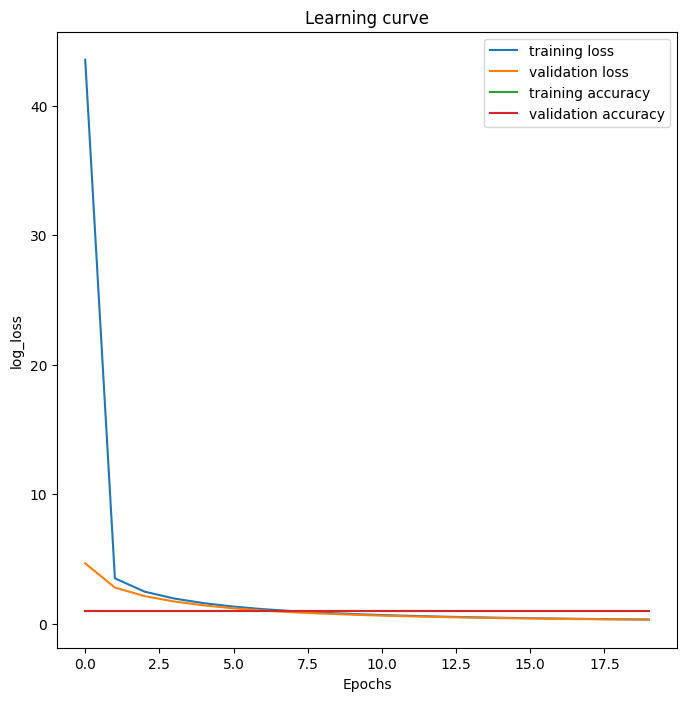

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(resultTrain1.history["loss"], label="training loss")
plt.plot(resultTrain1.history["val_loss"], label="validation loss")
plt.plot(resultTrain1.history["accuracy"], label="training accuracy")
plt.plot(resultTrain1.history["val_accuracy"], label="validation accuracy")


plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
import numpy as np

# Function to preprocess the input data for a specific engine unit
def preprocess_data_for_prediction(df, id, batch_size):
    dfTemp = df.loc[df['unit_id'] == id]
    # Initialize inputNP with the correct number of columns (25 in this case)
    inputNP = np.empty((0, dfTemp.iloc[:, 1:-2].shape[1]), int)
    start = 0
    for i in range(len(dfTemp) - batch_size + 1):
        # Append the data, ensuring the correct columns are selected
        inputNP = np.append(inputNP, dfTemp.iloc[start:start + batch_size, 1:-2].values, axis=0)
        start = start + 1
    input_data = np.reshape(inputNP, (-1, batch_size, dfTemp.iloc[:, 1:-2].shape[1]))  # Reshape with the correct number of features
    input_data = input_data.astype('float32')
    return input_data

# Replace 'testIDs' with the list of engine unit IDs for which you want to predict RUL
testIDs = [100]

# Create a dictionary to store the RUL predictions for each engine unit
rul_predictions = {}

# Loop over all engine units to predict the RUL for each
for specific_engine_id in testIDs:
    # Preprocess the input data for the specific engine unit
    input_data_specific = preprocess_data_for_prediction(dfTest, specific_engine_id, batch_size=batch70)

    # Make predictions using the trained LSTM model
    predictions = model.predict(input_data_specific)

    # Post-process the predictions to obtain the maximum cycles left (RUL)
    # Here, we assume the last prediction for each input sequence represents the RUL
    rul_cycles = np.argmax(predictions[:, -1])

    # Store the RUL prediction in the dictionary with the engine unit ID as the key
    rul_predictions[specific_engine_id] = rul_cycles

# Display the RUL predictions for each engine unit
for engine_id, rul in rul_predictions.items():
    print(f"Predicted maximum cycles left for engine unit {engine_id}: {rul} cycles")

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 776ms/step
Predicted maximum cycles left for engine unit 100: 128 cycles
